# Projekt - odovzdanie 1
 
 **Autori:** Patrik Villant, Ivan Vykopal
 
 ## Dataset pre personal_train
 
 Dataset obsahuje meno pacienta, adresu, vek, pohlavie a dátum narodenia.

In [2]:
# import potrebných knižníc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
personal = pd.read_csv('personal_train.csv')

In [4]:
personal.head(10)

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",-4700,Female,1972-03-14 00 00 00
1,1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",52,Male,1967-02-10 00:00:00
2,2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",46,Female,1972/12/15
3,3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",43,Male,1976-03-16
4,4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",68,Male,1951-05-04
5,5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",58,Male,1960-11-24
6,6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,47,Female,1972-01-05
7,7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,52,Male,1967-10-05
8,8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",44,Male,1975-07-04
9,9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",70,Female,1949-03-24


Výpis prvých 10 záznamov z datasetu personal_train.csv

In [5]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3933 entries, 0 to 3932
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     3933 non-null   int64 
 1   name           3933 non-null   object
 2   address        3933 non-null   object
 3   age            3933 non-null   int64 
 4   sex            3933 non-null   object
 5   date_of_birth  3933 non-null   object
dtypes: int64(2), object(4)
memory usage: 184.5+ KB


V datasete máme 3933 záznamov a 6 atribútov. 2x - integer, 4x - string, pričom jeden z nich je dátum, ktorý by mohol mať iný formát.

In [6]:
personal.shape[0] - personal.dropna().shape[0]

0

V datasete nemáme nulové hodnoty

In [7]:
# odstránenie stĺpca s indexom
personal = personal.drop(columns=['Unnamed: 0'])

In [8]:
personal.describe(include='all')

,name,address,age,sex,date_of_birth
count,3933,3933,3933.000000,3933,3933
unique,3933,3933,NaN,2,3703
top,Taylor Porter,Unit 4266 Box 5620\r\nDPO AA 97458,NaN,Male,1961-07-30
freq,1,1,NaN,2621,3
mean,NaN,NaN,84.559369,NaN,NaN
std,NaN,NaN,1713.232486,NaN,NaN
min,NaN,NaN,-8400.000000,NaN,NaN
25%,NaN,NaN,43.000000,NaN,NaN
50%,NaN,NaN,52.000000,NaN,NaN
75%,NaN,NaN,61.000000,NaN,NaN


V datasete vypíšeme deskriptívne štatistiky atribútov.

Zo štatistiky je možné vidieť, že nemáme žiadne duplicitné hodnoty. Ďalej sme zistili, že prevládajú v datasete muži a že traja pacienti sa narodili v rovnaký deň.

#### Atribút age

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

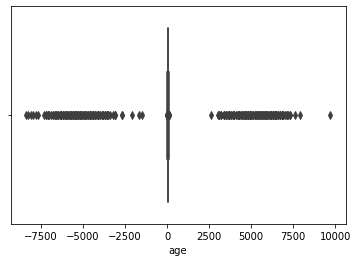

In [9]:
sns.boxplot(personal.age)

Viacero hodnôt age je nereálnych (záporné hodnoty, hodnoty nad 150 rokov)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

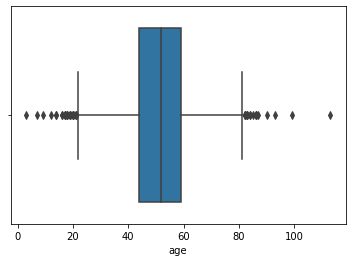

In [10]:
test = personal[ (personal.age >= 0) & (personal.age < 150)]
sns.boxplot(test.age)

Vyfiltrovali sme reálne hodnoty (od 0 po 150) a vytvorili boxplot hodnôt, pričom boli zobrazení len tí pacienti, ktorí spĺňajú podmienku, že ich vek je medzi 0 a 150.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

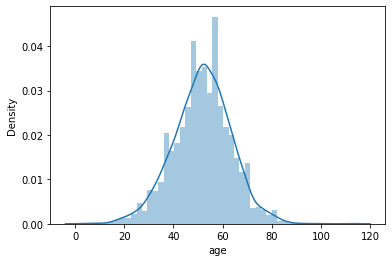

In [23]:
sns.distplot(test.age, bins=50)

Vytvorili sme si histogram z hodnôt veku, z ktorého vyčítame, že najviac ľudí má niečo málo ako 60 rokov.

#### Atribút sex

<AxesSubplot:>

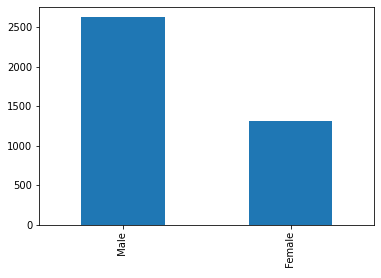

In [12]:
personal.sex.value_counts().plot.bar()

V datasete prevláda mužské pohlavie.

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


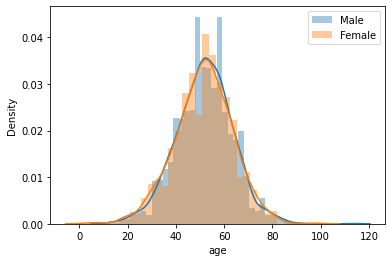

In [19]:
sns.distplot(pd.to_numeric(test[test.sex.str.strip() == 'Male'].age, errors="coerce").astype(int),label="Male")
sns.distplot(pd.to_numeric(test[test.sex.str.strip() == 'Female'].age, errors="coerce").astype(int),label="Female")
plt.legend()
plt.show()

Pri zobrazení len pacientov, ktorí majú správny vek (od 0 do 150) vidíme, že distribúcia medzi mužmi a ženami na základe veku je veľmi podobná.

Atribút date_of_birth má zlý formát (čo sme zistili pri výpise pár záznamov), bude potrebná určiť rovnaké formátovanie pre tento atribút.

In [20]:
personal[personal.name.duplicated()]

,name,address,age,sex,date_of_birth


Zistili sme, že v datasete personal_train nie sú žiadne duplicitné hodnoty.

Atribút age a atribút date_of_birth závisa od seba. S tým, že nesprávny vek pri pacientoch vieme upraviť na základe atribútu date_of_birth, avšak až keď date_of_birth bude mať upravený formát.  

### Identifikácia problémov: 
- v datasete je problém s formátom pri date_of_birth
- v datasete je problém s vekom, kde vek nadobúda nereálne hodnoty a veľa výchyliek
- adresy obsahujú biele znaky (\r\n), čo však nemusí zohrávať veľkú úlohu

### Riešenie problémov:
- pri atribúte age, vieme vek dopočítať na základe date_of_birth (avšak pri nahliadnutí na záznamy, vek je určený na základe roku 2019)
- pri atribúte date_of_birth riešením je zjednotenie formátu dátumu

 ## Dataset pre other_train

In [24]:
other = pd.read_csv('other_train.csv')
other.head(10)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,fnlwgt,class,income,medical_info,native-country,hours-per-week,capital-loss,workclass
0,0,Nelson Dupas,USS Wagner\r\nFPO AP 75518,White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.0,Some-college,32916.0,0.0,<=50K,"{'mean_glucose':'129.6171875','std_glucose':'4...",United-States,45.0,0.0,Private
1,1,Jeremy Helfrich,"0611 Jones Cliffs\r\nPort Kevin, AR 87203",White,Married-civ-spouse,Prof-specialty,f,15.0,Husband,15024.0,Prof-school,323798.0,0.0,>50K,"{'mean_glucose':'100.546875','std_glucose':'39...",United-States,55.0,0.0,Private
2,2,Luis Burdick,116 Wallace Meadow Suite 259\r\nPort Jenniferb...,White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.0,HS-grad,116927.0,1.0,>50K,"{'mean_glucose':'26.09375','std_glucose':'nan'...",United-States,42.0,0.0,Self-emp-inc
3,3,Marion Bursey,"85508 Martin Villages\r\nJonathanshire, AL 29047",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,206351.0,0.0,<=50K,"{'mean_glucose':'113.0625','std_glucose':'42.8...",United-States,40.0,0.0,Private
4,4,Allen Brickley,58775 Thomas Mills Apt. 873\r\nLake Richardhav...,White,Married-civ-spouse,Craft-repair,f,13.0,Husband,0.0,Bachelors,37939.0,0.0,<=50K,"{'mean_glucose':'131.1328125','std_glucose':'4...",United-States,35.0,0.0,Self-emp-not-inc
5,5,Charles Wing,"752 Jeffrey Mountains\r\nWest Amyfurt, WA 37220",White,Separated,Other-service,f,9.0,Not-in-family,0.0,HS-grad,205934.0,1.0,<=50K,"{'mean_glucose':'68.171875','std_glucose':'39....",United-States,25.0,0.0,Private
6,6,Hector Laverdiere,"386 James Port\r\nJordanville, NH 35244",White,Married-civ-spouse,Transport-moving,f,10.0,Husband,0.0,Some-college,33304.0,1.0,>50K,"{'mean_glucose':'57.984375','std_glucose':'34....",United-States,40.0,0.0,Private
7,7,Jackson Jimenez,"8161 Hopkins Locks\r\nTaylorhaven, CA 01893",Black,Married-civ-spouse,Craft-repair,f,9.0,Husband,4386.0,HS-grad,160808.0,1.0,<=50K,"{'mean_glucose':'39.84375','std_glucose':'34.3...",United-States,48.0,0.0,Private
8,8,Charles Langley,"3036 Bailey Loaf Suite 670\r\nSmithhaven, IL 0...",Black,Never-married,Other-service,F,4.0,Unmarried,0.0,7th-8th,202822.0,0.0,<=50K,"{'mean_glucose':'120.6640625','std_glucose':'4...",Trinadad&Tobago,14.0,0.0,Private
9,9,David Burt,91514 Kevin Extension Suite 992\r\nObrienhaven...,White,Married-civ-spouse,Machine-op-inspct,FALSE,9.0,Husband,0.0,HS-grad,144608.0,0.0,<=50K,"{'mean_glucose':'119.7890625','std_glucose':'4...",United-States,40.0,0.0,Private


Výpis prvých 10 riadkov datasetu other_train.csv

In [25]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3983 non-null   int64  
 1   name            3983 non-null   object 
 2   address         3983 non-null   object 
 3   race            3967 non-null   object 
 4   marital-status  3710 non-null   object 
 5   occupation      3965 non-null   object 
 6   pregnant        3967 non-null   object 
 7   education-num   3965 non-null   float64
 8   relationship    3964 non-null   object 
 9   capital-gain    3963 non-null   float64
 10  education       3967 non-null   object 
 11  fnlwgt          3969 non-null   float64
 12  class           3968 non-null   float64
 13  income          3966 non-null   object 
 14  medical_info    3968 non-null   object 
 15  native-country  3967 non-null   object 
 16  hours-per-week  3965 non-null   float64
 17  capital-loss    3960 non-null   f

V datasete sa nachadzaju kategorické, reťazcové a číslené atribúty, pričom atribút medical_info obsahje v sebe json formát.

In [26]:
other.shape

(3983, 19)

V datasete môžeme nájsť 3983 riadkov a 19 atribútov s tým, že atribút medical_info je tvorený viacerými atribútmi a prvý atribút predstavuje index záznamu.

In [27]:
other = other.drop(columns=['Unnamed: 0'])

Vymazanie nežiadúceho atribútu - číslovanie

In [28]:
other.shape[0] - other.dropna().shape[0]

334

Počet záznamov s nulovými hodnotami je 334.

In [29]:
other.isnull().sum()

name                0
address             0
race               16
marital-status    273
occupation         18
pregnant           16
education-num      18
relationship       19
capital-gain       20
education          16
fnlwgt             14
class              15
income             17
medical_info       15
native-country     16
hours-per-week     18
capital-loss       23
workclass          16
dtype: int64

Výpis počtu prázdnych hodnôt pre jednotlivé atribúty.

In [30]:
other.isnull().sum().sum()

530

Celkovo je v datasete 530 chýbajúcich hodnôt, avšak, je to bez rozdelenia atribútu medical_info.

In [32]:
columns = eval(other.medical_info[0])
len(columns)

8

Atribút medical_info v sebe obsahuje ďalších 8 atribútov.

In [33]:
for i in range(len(other)):
    data = other.medical_info[i]
    if str(data) == 'nan':
        j ={'mean_glucose': np.nan,
             'std_glucose': np.nan,
             'kurtosis_glucose': np.nan,
             'skewness_glucose': np.nan,
             'mean_oxygen': np.nan,
             'std_oxygen': np.nan,
             'kurtosis_oxygen': np.nan,
             'skewness_oxygen': np.nan}
    else:
        j = eval(str(data))
    other.at[i,'mean_glucose'] = float(j['mean_glucose'])
    other.at[i,'std_glucose'] = float(j['std_glucose'])
    other.at[i,'kurtosis_glucose'] = float(j['kurtosis_glucose'])
    other.at[i,'skewness_glucose'] = float(j['skewness_glucose'])
    other.at[i,'mean_oxygen'] = float(j['mean_oxygen'])
    other.at[i,'std_oxygen'] = float(j['std_oxygen'])
    other.at[i,'kurtosis_oxygen'] = float(j['kurtosis_oxygen'])
    other.at[i,'skewness_oxygen'] = float(j['skewness_oxygen'])

In [34]:
other = other.drop(columns=['medical_info'])

Aby sme vedeli pracovať so všetkými atribútmi je potrebné rozdelenie atribútu "medical_info" na jednotlivé atribúty a zmazanie pôvodného atribútu "medical_info".

In [35]:
other.head()

,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,education,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
0,Nelson Dupas,USS Wagner\r\nFPO AP 75518,White,Married-civ-spouse,Exec-managerial,f,10.0,Husband,0.0,Some-college,...,0.0,Private,129.617188,47.774392,0.114308,0.066342,2.135452,14.168363,10.458148,139.089149
1,Jeremy Helfrich,"0611 Jones Cliffs\r\nPort Kevin, AR 87203",White,Married-civ-spouse,Prof-specialty,f,15.0,Husband,15024.0,Prof-school,...,0.0,Private,100.546875,39.419193,0.519220,0.793882,3.300167,20.301145,7.566061,63.827315
2,Luis Burdick,116 Wallace Meadow Suite 259\r\nPort Jenniferb...,White,Married-civ-spouse,Exec-managerial,f,9.0,Husband,0.0,HS-grad,...,0.0,Self-emp-inc,26.093750,NaN,5.067584,28.013690,26.015050,52.619602,2.345710,5.245282
3,Marion Bursey,"85508 Martin Villages\r\nJonathanshire, AL 29047",White,Married-civ-spouse,Sales,f,10.0,Husband,0.0,Some-college,...,0.0,Private,113.062500,42.812226,0.231768,0.540982,1.731605,11.762521,11.964837,203.090244
4,Allen Brickley,58775 Thomas Mills Apt. 873\r\nLake Richardhav...,White,Married-civ-spouse,Craft-repair,f,13.0,Husband,0.0,Bachelors,...,0.0,Self-emp-not-inc,131.132812,46.648682,0.334587,0.566602,2.887124,21.377515,8.207284,71.573546


Výpis prvých piatich záznamov už upraveného datasetu.

In [36]:
other.isnull().sum()

name                  0
address               0
race                 16
marital-status      273
occupation           18
pregnant             16
education-num        18
relationship         19
capital-gain         20
education            16
fnlwgt               14
class                15
income               17
native-country       16
hours-per-week       18
capital-loss         23
workclass            16
mean_glucose         15
std_glucose         414
kurtosis_glucose     15
skewness_glucose     15
mean_oxygen          15
std_oxygen           15
kurtosis_oxygen      15
skewness_oxygen      15
dtype: int64

In [25]:
other.isnull().sum().sum()

1034

Výpis počtu prázdnych hodnot v jednotlivych atribútoch a celkovy súčet je 1034.

In [37]:
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   race              3967 non-null   object 
 3   marital-status    3710 non-null   object 
 4   occupation        3965 non-null   object 
 5   pregnant          3967 non-null   object 
 6   education-num     3965 non-null   float64
 7   relationship      3964 non-null   object 
 8   capital-gain      3963 non-null   float64
 9   education         3967 non-null   object 
 10  fnlwgt            3969 non-null   float64
 11  class             3968 non-null   float64
 12  income            3966 non-null   object 
 13  native-country    3967 non-null   object 
 14  hours-per-week    3965 non-null   float64
 15  capital-loss      3960 non-null   float64
 16  workclass         3967 non-null   object 


Dataset má 2 typy premennych - float, object, pričom sú to kategorické, číselné a reťažcové atribúty.

In [38]:
other.shape

(3983, 25)

Novo-vytvorený dataset má 3983 riadkov a 25 atribútov.

In [39]:
other.describe()

,education-num,capital-gain,fnlwgt,class,hours-per-week,capital-loss,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen
count,3965.000000,3963.000000,3969.000000,3968.000000,3965.000000,3960.000000,3968.000000,3569.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000,3968.000000
mean,10.115763,1069.521827,189374.662383,0.256552,40.406305,76.721212,101.216507,45.149233,0.954596,4.241261,18.467885,31.172996,7.410578,91.257886
std,2.568333,7353.525505,105318.658007,0.436785,12.375377,387.449247,33.590085,7.595777,1.613398,9.696736,34.747837,22.294108,4.809258,108.411705
min,1.000000,0.000000,19410.000000,0.000000,2.000000,0.000000,6.187500,25.695250,-1.641515,-1.755332,0.213211,7.370432,-2.597872,-1.976976
25%,9.000000,0.000000,120067.000000,0.000000,40.000000,0.000000,87.544922,40.165726,0.072000,-0.120593,2.063127,15.029585,3.631263,12.830509
50%,10.000000,0.000000,179973.000000,0.000000,40.000000,0.000000,110.644531,45.835260,0.311577,0.379008,3.229933,20.551260,7.783017,68.505049
75%,12.000000,0.000000,232855.000000,1.000000,45.000000,0.000000,124.160156,50.264680,0.788435,2.107509,12.652383,43.255617,10.269058,127.017151
max,16.000000,99999.000000,889965.000000,1.000000,99.000000,4356.000000,189.734375,91.206475,8.069522,68.101622,217.371238,110.642211,34.539844,1191.000837


Výpis deskriptivnych štatistík číselných atribútov.

Na základe tejto štatistiky vieme určiť priemerné hodnoty, štandardné odchýlky, kvartily, minimálne a maximálne hodnoty pre číselné atribúty.

In [40]:
other.describe(include=[object])

,name,address,race,marital-status,occupation,pregnant,relationship,education,income,native-country,workclass
count,3983,3983,3967,3710,3965,3967,3964,3967,3966,3967,3967
unique,3933,3933,5,8,15,6,9,16,2,39,15
top,Nick Fried,Unit 9169 Box 4422\r\nDPO AP 27992,White,Married-civ-spouse,Prof-specialty,f,Husband,HS-grad,<=50K,United-States,Private
freq,3,3,3394,1620,528,3500,1590,1279,3002,3559,2496


Výpis deskriptívnych štatistík atribútov, ktoré nie sú číselné.

Na základe tejto štatistiky vieme určiť počet unikátnych hodnôt, najčastejšiu hodnotu a jej frekvenciu. Na základe tejto tabuľky vidíme, že podľa mena máme v datasete 50 duplikátov, najčastejšou rasou je White. Ďalej vidíme, že pregnant obsahuje 6 unikátnych hodnôt, avšak podľa správnosti by mala obsahovať len 2.

In [41]:
len(other[other.name.duplicated()])

50

Počet duplikátov podľa mena je 50, tak ako sme zistili predtým.

**Pozrieť sa na duplicity, či ide len o meno.**

### Významné atribúty

#### Atribút race

<AxesSubplot:>

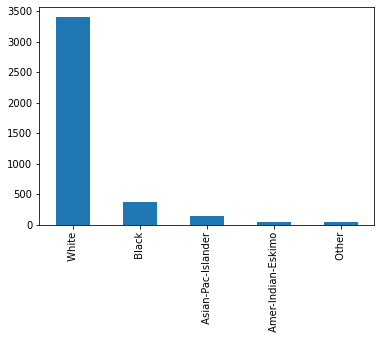

In [30]:
other.race.value_counts().plot.bar()

In [31]:
other.race.isnull().sum()

16

Analyzovanie rás v danom datasete, prevláda biela rasa a máme 16 prázdnych hodnôt

#### Atribút pregnant

In [37]:
other.pregnant.unique()

array(['f', 'F', 'FALSE', 't', nan, 'TRUE', 'T'], dtype=object)

In [38]:
def unify(p):
    if p in ['f','F','FALSE']:
        return False
    if p in ['t','T','TRUE']:
        return True
    else:
        return np.nan

other.pregnant = other.pregnant.apply(unify)

<AxesSubplot:>

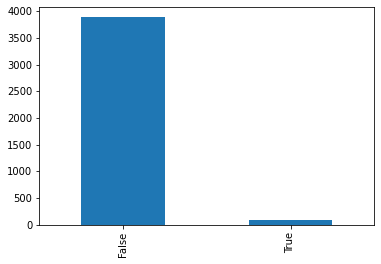

In [39]:
other.pregnant.value_counts().plot.bar()

In [40]:
other.pregnant.isnull().sum()

16

Keďže v atribúte pregnant sa vyskytovali viaceré hodnoty, ktorých výpovedna hodnota bola rovnaká, no bola inak napísaná, zmenili sme ich na jednotné, vyskytoval sa už iba True, False alebo NaN a zistili sme, že je menej tehotných exemplárov a 16 hodnôt je chýbajúcich.

#### Atribút fnlwgt

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

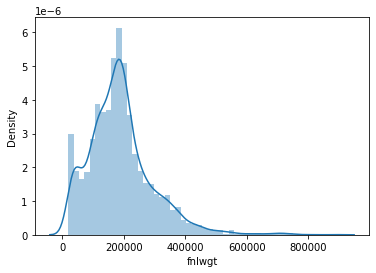

In [43]:
sns.distplot(other['fnlwgt'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

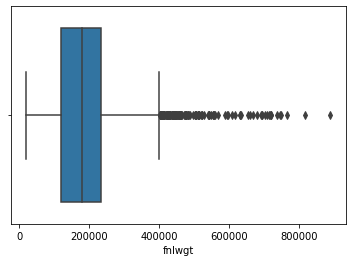

In [44]:
sns.boxplot(other['fnlwgt'])

In [45]:
other.fnlwgt.isnull().sum()

14

Vykreslenie grafu z atribútu fnlwgt a vypísanie počtu prázdnych hodnôt: 14.
Zároveň z boxplotu vidíme, že má veľa vychýlených hodnôt, ktoré sa nachádzajú nad hodnotou 400000.

#### Atribút class

Ide o kategorický atribút, ktorý určuje či je pacient chorý (1) alebo zdravý (0).

<AxesSubplot:>

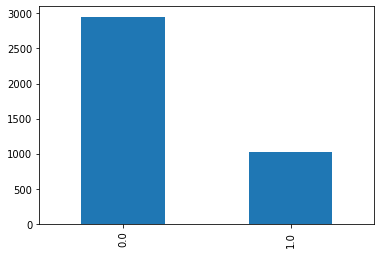

In [46]:
other['class'].value_counts().plot.bar()

In [47]:
other['class'].isnull().sum()

15

Z grafu vieme vyčítať, že viacej ľudí je zdravých ako chorých, no aj tento atribút má 15 prázdnych hodnôt.

#### Atribút hours-per-week

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

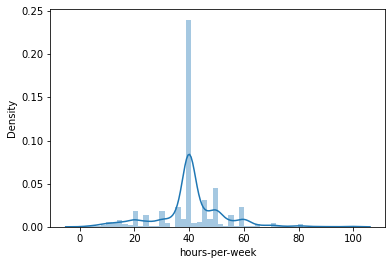

In [48]:
sns.distplot(other['hours-per-week'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

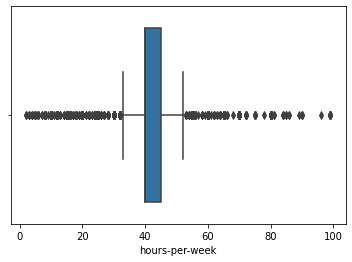

In [49]:
sns.boxplot(other['hours-per-week'])

In [50]:
other['hours-per-week'].isnull().sum()

18

Z grafov sme zistili, že ľudia najčastejšie pracujú v priemere okolo 40 hodín týždenne, pričom na základe deskriptívnej štatistiky prismerná pracovná doba pacientov je 40,41 hodiny za víkend. Daný atribú obsahuje aj 18 chýbajúcich hodnôt a veľa vychýlených hodnôt na základe boxplotu.

#### Atribút mean_glucose

d:\python_examples\.virtualenvs\xvillant\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

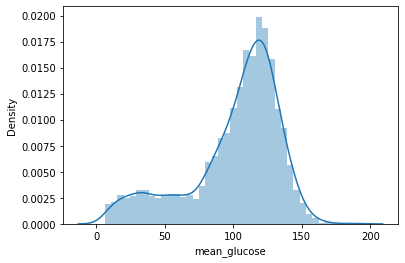

In [47]:
sns.distplot(other['mean_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_glucose'>

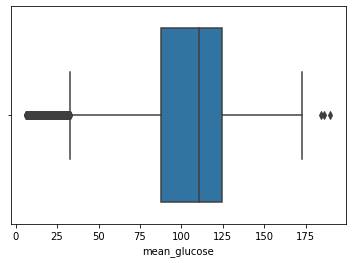

In [51]:
sns.boxplot(other['mean_glucose'])

In [52]:
other['mean_glucose'].isnull().sum()

15

Na základe deskriptívnej štatistiky sme zistili, že priemerný mean_glucose je okolo 101. Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj vychýlené hodnoty.

#### Atribút std_glucose

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_glucose', ylabel='Density'>

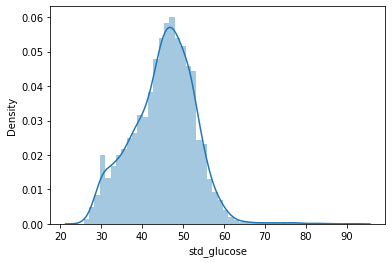

In [53]:
sns.distplot(other['std_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_glucose'>

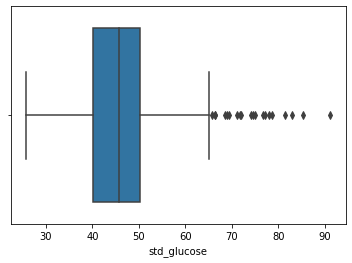

In [54]:
sns.boxplot(other['std_glucose'])

In [55]:
other['std_glucose'].isnull().sum()

414

Na základe deskriptívnej štatistiky sme zistili, že priemerný std_glucose je okolo 45. Zároveň atribút obsahuje 414 chýbajúcich hodnôt a aj vychýlené hodnoty, ktoré sa nachádzahjú nad hodnotou cez 60.

#### Atribút kurotis_glucose

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

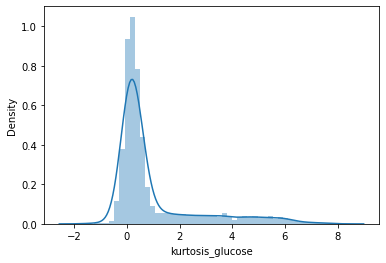

In [56]:
sns.distplot(other['kurtosis_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_glucose'>

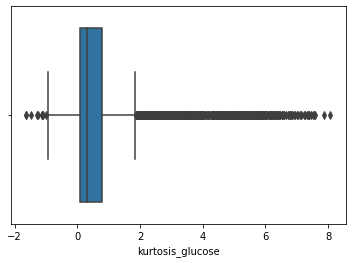

In [57]:
sns.boxplot(other['kurtosis_glucose'])

In [58]:
other['kurtosis_glucose'].isnull().sum()

15

Na základe deskriptívnej štatistiky sme zistili, že priemerný kurtosis_glucose je 0.95. Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj množstvo vychýlených hodnôt.

#### Atribút skewness_glucose

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_glucose', ylabel='Density'>

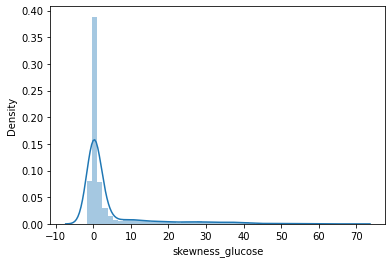

In [59]:
sns.distplot(other['skewness_glucose'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_glucose'>

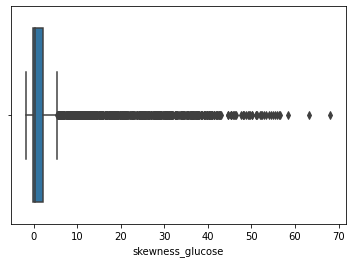

In [60]:
sns.boxplot(other['skewness_glucose'])

In [61]:
other['skewness_glucose'].isnull().sum()

15

Na základe deskriptívnej štatistiky sme zistili, že priemerný skewness_glucose je 4.24. Väčšina hodnôt sa pohybuje od 0 po 5 Zároveň atribút obsahuje 15 chýbajúcich hodnôt a aj veľké množstvo vychýlených hodnôt.

#### Atribút mean_oyxgen

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_oxygen', ylabel='Density'>

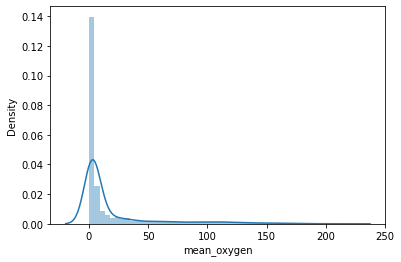

In [62]:
sns.distplot(other['mean_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_oxygen'>

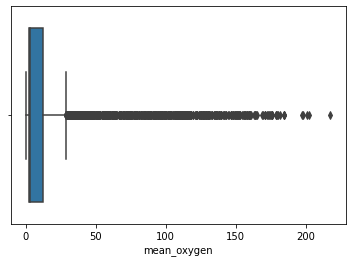

In [63]:
sns.boxplot(other['mean_oxygen'])

In [65]:
other['mean_oxygen'].isnull().sum()

15

Podľa deskriptívnej štatistiky je priemerná hodnota mean_oxygen 18.47. V atribúte sa nachádza množstvo outlierov (vychýlených hodnôt) a obsahuje aj 15 chýbajúcich hodnôt. Väčšina hodnôt sa pohybuje v rozmedzí 0 až 12 (čo predtavuje horný kvartil).

#### Atribút std_oxygen

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_oxygen', ylabel='Density'>

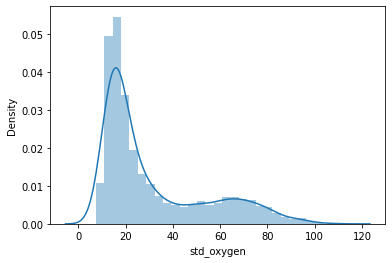

In [66]:
sns.distplot(other['std_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_oxygen'>

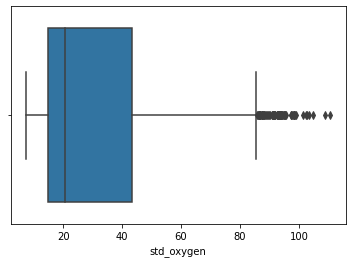

In [67]:
sns.boxplot(other['std_oxygen'])

In [68]:
other['std_oxygen'].isnull().sum()

15

Priemerná hdonota je 31.17. Obsahuje aj vychýlené hodnoty a počet chýbajúcich hodnôt je 15.

#### Atribút kurtosis_oxygen

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_oxygen', ylabel='Density'>

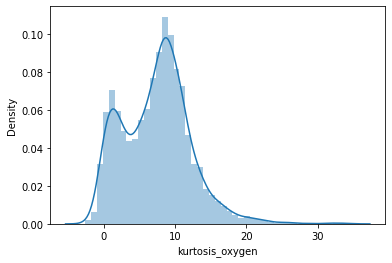

In [69]:
sns.distplot(other['kurtosis_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_oxygen'>

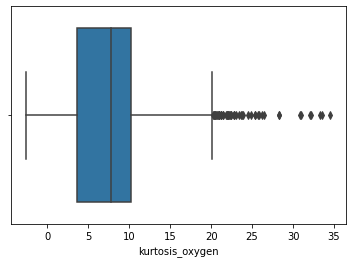

In [70]:
sns.boxplot(other['kurtosis_oxygen'])

In [71]:
other['kurtosis_oxygen'].isnull().sum()

15

Obsahuje vychýlené hodnoty, počet chýbajúcich hodnôt je 15. Priemerná hodnota kurtosis_oxygen je 7.41. Pričom z grafu je vidieť, že najväčšia čast z distibúcie je medzi 4 až 10.

#### Atribút skewness_oxygen

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_oxygen', ylabel='Density'>

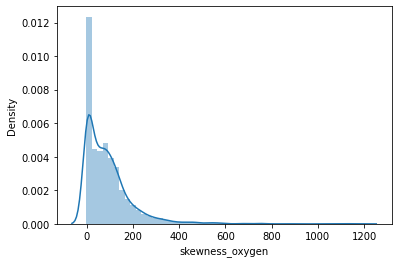

In [72]:
sns.distplot(other['skewness_oxygen'])

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_oxygen'>

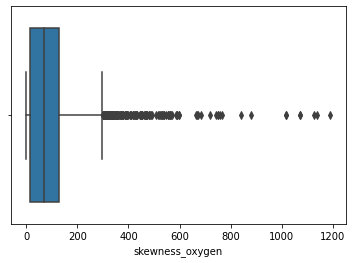

In [73]:
sns.boxplot(other['skewness_oxygen'])

In [74]:
other['skewness_oxygen'].isnull().sum()

15

Priemerná hodnota pre atribút skewness_oxygen je 91.26. Počet chýbajúcich hodnôt je 15 a obsahuje množstvo vychýlených hodnôt.

### Identifikácia chýb:
- v atribúte medical_info je viac hodnot zahrnutých dokopy
- vo viacerých atribútoch je viacero hodnôt, ktoré vyznačujú tú istú skutočnosť napríklad "TRUE","T","t","F","False" v atribúte pregnant
- v atribúte name su duplictné zaznamy
- v atribútoch sa nachádzajú chýbajúce hodnoty
- v atribútoch sa nachádza aj množstvo vychýlených hodnôt

### Riešenie identifikovaných chýb
- atribút medical_info bude potrebné rozdeliť na viaceré atribúty (tak ako to bolo spravené v tomto dokumente)
- pri atribúte pregnant je potrebné zjednotiť hodnoty, tak aby nadobúdali len 2 unikátne hodnoty (tak ako to bolu spravené v tomto dokumente
- duplicitné hodnoty bude asi najpravdepodobnejšie odstrániť
- pri chýbajúcich hodnotách bude najlepšie ich nahradiť priemerom
- pri atribúte class nevieme jednoznačne určiť priemer, tak je možné, že tých 15 záznamov môžeme vymazať